From https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87:
About Missingno:
    " This package is a very flexible missing data visualization tool built with matplotlib and it takes any pandas DataFrame thrown at it. "
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


import datetime
import missingno as msno
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer 


In [2]:
london_yearly = pd.read_csv("Datasets/housing_in_london_yearly_variables.csv")
# london_yearly["number_of_jobs"] = london_yearly["number_of_jobs"].fillna(0)
# london_yearly["life_satisfaction"] = london_yearly["life_satisfaction"].fillna(0)
london_yearly["area_size"] = london_yearly["area_size"].fillna(0)
london_yearly["no_of_houses"] = london_yearly["no_of_houses"].fillna(0)

london_yearly['date'] = pd.to_datetime(london_yearly.date)
london_yearly = pd.DataFrame(london_yearly)
london_yearly.fillna(0)
#london_yearly['area'] = london_yearly['area'].astype(float)

del london_yearly["code"]
del london_yearly["recycling_pct"]
del london_yearly["borough_flag"]

london_yearly.head()

,area,date,median_salary,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size,no_of_houses
0,city of london,1999-12-01,33020.0,NaN,48922,6581.0,NaN,0.0,0.0
1,barking and dagenham,1999-12-01,21480.0,NaN,23620,162444.0,NaN,0.0,0.0
2,barnet,1999-12-01,19568.0,NaN,23128,313469.0,NaN,0.0,0.0
3,bexley,1999-12-01,18621.0,NaN,21386,217458.0,NaN,0.0,0.0
4,brent,1999-12-01,18532.0,NaN,20911,260317.0,NaN,0.0,0.0


In [3]:
# leave_values = ["inner london", "outer london"] #leave out these areas because of overlap and too many NaN values
# london_yearly=london_yearly.applymap(lambda x: np.nan if x in leave_values else x)

##code caused duplicated that prevented created a pivot table so do not use

In [4]:
london_yearly.head()

,area,date,median_salary,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size,no_of_houses
0,city of london,1999-12-01,33020.0,NaN,48922,6581.0,NaN,0.0,0.0
1,barking and dagenham,1999-12-01,21480.0,NaN,23620,162444.0,NaN,0.0,0.0
2,barnet,1999-12-01,19568.0,NaN,23128,313469.0,NaN,0.0,0.0
3,bexley,1999-12-01,18621.0,NaN,21386,217458.0,NaN,0.0,0.0
4,brent,1999-12-01,18532.0,NaN,20911,260317.0,NaN,0.0,0.0


In [5]:
#Checking for null values and using this info to apply the msno feature
missingdata_df = london_yearly.columns[london_yearly.isnull().any()].tolist()
missingdata_df

['median_salary', 'life_satisfaction', 'population_size', 'number_of_jobs']

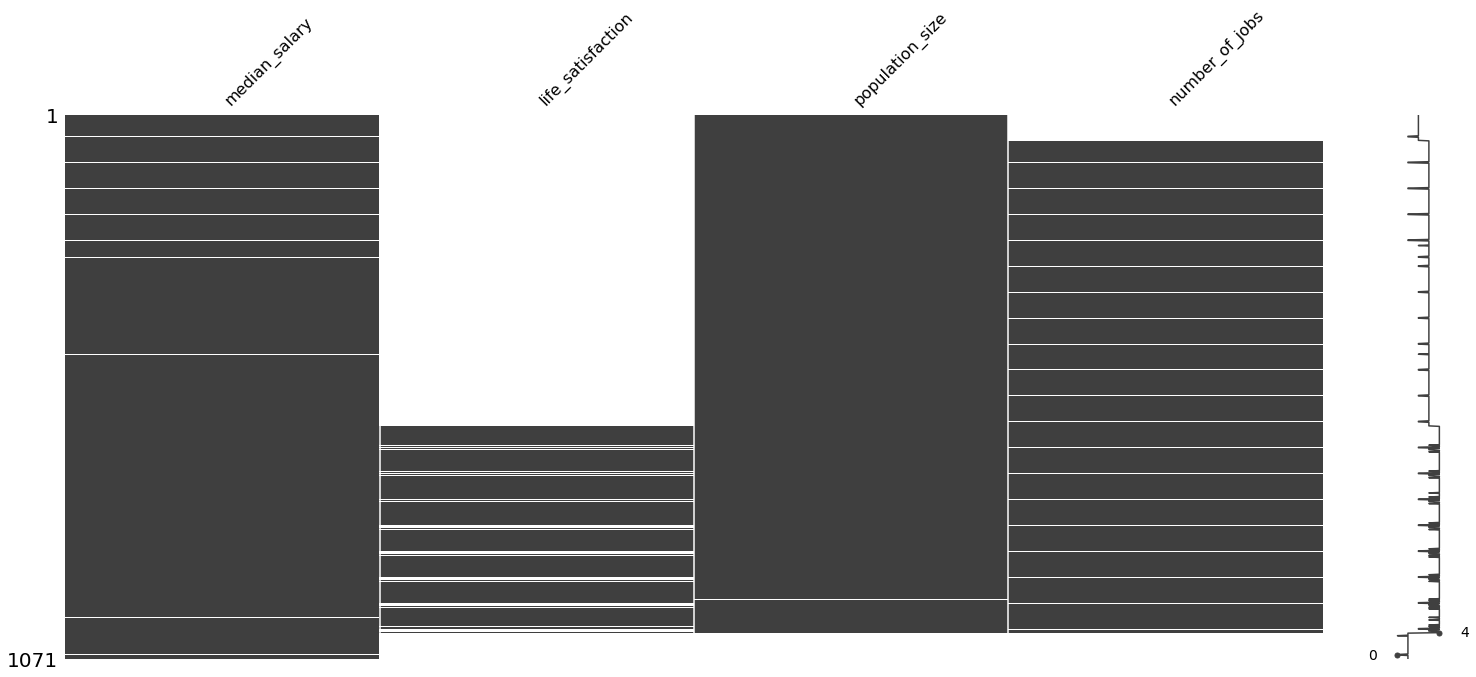

In [6]:
msno.matrix(london_yearly[missingdata_df])

In [7]:
london_yearly.date.unique()

array(['1999-12-01T00:00:00.000000000', '2000-12-01T00:00:00.000000000',
       '2001-12-01T00:00:00.000000000', '2002-12-01T00:00:00.000000000',
       '2003-12-01T00:00:00.000000000', '2004-12-01T00:00:00.000000000',
       '2005-12-01T00:00:00.000000000', '2006-12-01T00:00:00.000000000',
       '2007-12-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [8]:
london_yearly.life_satisfaction.unique()

array([ nan, 7.05, 7.43, 7.42, 7.11, 7.5 , 7.25, 7.04, 7.22, 7.23, 7.18,
       7.  , 7.38, 7.31, 7.35, 7.4 , 7.26, 7.09, 7.57, 7.33, 7.13, 7.14,
       7.12, 7.52, 7.36, 7.39, 7.02, 7.46, 7.44, 7.37, 7.47, 7.28, 7.51,
       7.53, 7.41, 7.6 , 7.24, 7.01, 7.15, 7.07, 7.21, 7.17, 7.7 , 7.08,
       7.3 , 7.32, 7.54, 7.55, 7.67, 7.34, 7.58, 7.49, 7.56, 7.73, 7.71,
       7.45, 7.62, 7.63, 7.65, 7.64, 7.66, 7.89, 7.68, 7.69, 7.29, 7.78,
       7.87, 7.74, 7.48, 7.85, 7.96, 7.61, 7.75, 7.59, 7.76, 7.88, 7.79,
       7.91, 7.72, 7.92, 7.84, 7.82, 7.77])

In [9]:
london_yearly.dtypes

area                         object
date                 datetime64[ns]
median_salary               float64
life_satisfaction           float64
mean_salary                  object
population_size             float64
number_of_jobs              float64
area_size                   float64
no_of_houses                float64
dtype: object

In [10]:
london_yearly.area.unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'greenwich', 'hackney', 'hammersmith and fulham', 'haringey',
       'harrow', 'havering', 'hillingdon', 'hounslow', 'islington',
       'kensington and chelsea', 'kingston upon thames', 'lambeth',
       'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'tower hamlets',
       'waltham forest', 'wandsworth', 'westminster', 'north east',
       'north west', 'yorkshire and the humber', 'east midlands',
       'west midlands', 'east', 'london', 'south east', 'south west',
       'inner london', 'outer london', 'england', 'united kingdom',
       'great britain', 'england and wales', 'northern ireland',
       'scotland', 'wales'], dtype=object)

In [11]:
london_yearly_median = pd.DataFrame(london_yearly, columns=["date", "area", "median_salary"])
london_yearly_median.head()

,date,area,median_salary
0,1999-12-01,city of london,33020.0
1,1999-12-01,barking and dagenham,21480.0
2,1999-12-01,barnet,19568.0
3,1999-12-01,bexley,18621.0
4,1999-12-01,brent,18532.0


In [12]:
# # Imputer object using the mean strategy and  
# # missing_data type for imputation 

# ##Use for new dataset
# imputer = SimpleImputer(missing_values = np.NaN,  
#                         strategy ='mean') 

# # imputer = imputer.fit(london_yearly_median[:,2])
# # london_yearly_median[:,2]= london_yearly_median.transform(london_yearly_median[:,2])
# idf=pd.DataFrame(imputer.fit_transform(london_yearly_median))

In [13]:
london_yearly_median['median_salary'].fillna((london_yearly_median['median_salary'].mean()), inplace=True)
#filling in missing NaN values using this method instead of SimpleInputer due to failure to convert objects to floats
#which cannot be called using I

In [14]:
london_yearly_median['area'].unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'greenwich', 'hackney', 'hammersmith and fulham', 'haringey',
       'harrow', 'havering', 'hillingdon', 'hounslow', 'islington',
       'kensington and chelsea', 'kingston upon thames', 'lambeth',
       'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'tower hamlets',
       'waltham forest', 'wandsworth', 'westminster', 'north east',
       'north west', 'yorkshire and the humber', 'east midlands',
       'west midlands', 'east', 'london', 'south east', 'south west',
       'inner london', 'outer london', 'england', 'united kingdom',
       'great britain', 'england and wales', 'northern ireland',
       'scotland', 'wales'], dtype=object)

In [95]:
#Comparing line graphs first
#Compare mean salaries over the years

london_yearly_salary = london_yearly_median.pivot(index = 'area', columns = 'date', values = 'median_salary')
london_yearly_salary

date,1999-12-01 00:00:00,2000-12-01 00:00:00,2001-12-01 00:00:00,2002-12-01 00:00:00,2003-12-01 00:00:00,2004-12-01 00:00:00,2005-12-01 00:00:00,2006-12-01 00:00:00,2007-12-01 00:00:00,2008-12-01 00:00:00,...,2010-12-01 00:00:00,2011-12-01 00:00:00,2012-12-01 00:00:00,2013-12-01 00:00:00,2014-12-01 00:00:00,2015-12-01 00:00:00,2016-12-01 00:00:00,2017-12-01 00:00:00,2018-12-01 00:00:00,2019-12-01 00:00:00
area,,,,,,,,,,,,,,,,,,,,,
barking and dagenham,21480.000000,22618.000000,22323.000000,24813.000000,25358.000000,26089.000000,26680.0,26549.0,30200.0,29396.000000,...,28527.0,28201.0,33131.0,32248.000000,32698.0,33018.0,30994.000000,28553.0,29995.000000,28738.000000
barnet,19568.000000,21761.000000,20916.000000,23112.000000,23828.000000,27977.792183,27033.0,26071.0,27436.0,27978.000000,...,30000.0,30237.0,29594.0,29353.000000,31162.0,30900.0,32623.000000,32143.0,29927.000000,31624.000000
bexley,18621.000000,19363.000000,20217.000000,21101.000000,22247.000000,20946.000000,23936.0,24719.0,26457.0,28326.000000,...,27738.0,28638.0,27440.0,28512.000000,28505.0,29664.0,27977.792183,30733.0,27977.792183,31642.000000
brent,18532.000000,22348.000000,21878.000000,21350.000000,23018.000000,23323.000000,24209.0,25279.0,25763.0,27326.000000,...,25997.0,26772.0,27577.0,28034.000000,29514.0,29987.0,30699.000000,30134.0,30366.000000,31739.000000
bromley,16720.000000,16401.000000,15684.000000,16635.000000,19042.000000,21192.000000,24241.0,25715.0,25666.0,27236.000000,...,27712.0,28163.0,28082.0,28126.000000,27926.0,30444.0,30861.000000,29819.0,30762.000000,27977.792183
camden,23677.000000,25484.000000,27386.000000,27432.000000,30002.000000,30510.000000,31358.0,32418.0,33059.0,35314.000000,...,36527.0,35967.0,36962.0,36336.000000,36748.0,36970.0,37817.000000,38147.0,39198.000000,40196.000000
city of london,33020.000000,34903.000000,39104.000000,39750.000000,41795.000000,43347.000000,45000.0,46292.0,49955.0,50503.000000,...,52271.0,54381.0,54000.0,54202.000000,54710.0,54034.0,55487.000000,56295.0,61203.000000,61636.000000
croydon,19563.000000,21339.000000,20889.000000,22675.000000,22838.000000,24371.000000,24652.0,26049.0,25965.0,27482.000000,...,28586.0,28979.0,28974.0,30939.000000,31154.0,30628.0,31479.000000,32109.0,33804.000000,35237.000000
ealing,20580.000000,22512.000000,23862.000000,24542.000000,24349.000000,26722.000000,27235.0,26354.0,27490.0,29439.000000,...,28732.0,28646.0,31104.0,29733.000000,28825.0,28657.0,29241.000000,30259.0,29928.000000,31021.000000


In [16]:
london_yearly_salary.columns

DatetimeIndex(['1999-12-01', '2000-12-01', '2001-12-01', '2002-12-01',
               '2003-12-01', '2004-12-01', '2005-12-01', '2006-12-01',
               '2007-12-01', '2008-12-01', '2009-12-01', '2010-12-01',
               '2011-12-01', '2012-12-01', '2013-12-01', '2014-12-01',
               '2015-12-01', '2016-12-01', '2017-12-01', '2018-12-01',
               '2019-12-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [68]:
london_yearly_salary_base = london_yearly_salary["2019-12-01"].values
london_yearly_salary_base = pd.DataFrame(london_yearly_salary_base, columns = ["2019-12-01"])
london_yearly_salary_base.index.names = ['area']
london_yearly_salary_2019 = london_yearly_salary_base.sort_values(["2019-12-01"], ascending=False)
london_yearly_salary_2019.head(10)

,2019-12-01
area,
6,61636.0
43,46142.0
49,43556.0
24,41076.0
41,40303.0
5,40196.0
29,38992.0
17,37990.0
27,36825.0


In [97]:
london_yearly_salary = london_yearly_salary.reset_index(inplace = False)

In [88]:
london_yearly_salary_2019.reset_index(inplace=False)

london_yearly_salary_2019

,area,2019-12-01
0,6,61636.000000
1,43,46142.000000
2,49,43556.000000
3,24,41076.000000
4,41,40303.000000
5,5,40196.000000
6,29,38992.000000
7,17,37990.000000
8,27,36825.000000
9,22,36487.000000


In [105]:
top_10_london_salary = london_yearly_salary_2019.iloc[0:10, :]

top_10_all_months = pd.merge(top_10_london_salary, london_yearly_salary, how='outer', on = ['area'])

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [102]:
#london_yearly_salary = london_yearly_salary['area'].apply(str)
# london_yearly_salary['area'].apply(str)

# london_yearly_salary['area'] = london_yearly_salary['area'].apply(str)

# london_yearly_salary.applymap(str)

# london_yearly_salary = london_yearly_salary.applymap(str)

london_yearly_salary.area = london_yearly_salary.area.astype(np.int64)

In [103]:
london_yearly_salary.dtypes

date
area                   object
1999-12-01 00:00:00    object
2000-12-01 00:00:00    object
2001-12-01 00:00:00    object
2002-12-01 00:00:00    object
2003-12-01 00:00:00    object
2004-12-01 00:00:00    object
2005-12-01 00:00:00    object
2006-12-01 00:00:00    object
2007-12-01 00:00:00    object
2008-12-01 00:00:00    object
2009-12-01 00:00:00    object
2010-12-01 00:00:00    object
2011-12-01 00:00:00    object
2012-12-01 00:00:00    object
2013-12-01 00:00:00    object
2014-12-01 00:00:00    object
2015-12-01 00:00:00    object
2016-12-01 00:00:00    object
2017-12-01 00:00:00    object
2018-12-01 00:00:00    object
2019-12-01 00:00:00    object
dtype: object

In [86]:
london_yearly_salary_2019.dtypes

area            int64
2019-12-01    float64
dtype: object